# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [117]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [118]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

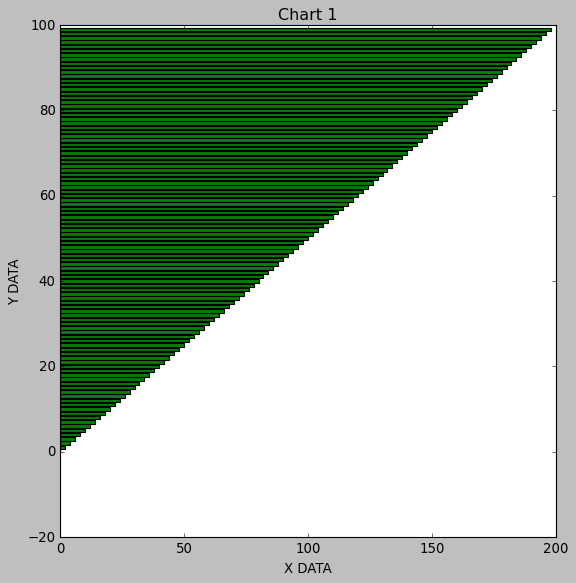

In [119]:
# Method 1
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(x, y, color='green')
plt.style.use('ggplot')
ax.title.set(y=2)
ax.set(xlabel='X DATA', ylabel='Y DATA', title='Chart 1')
plt.show();

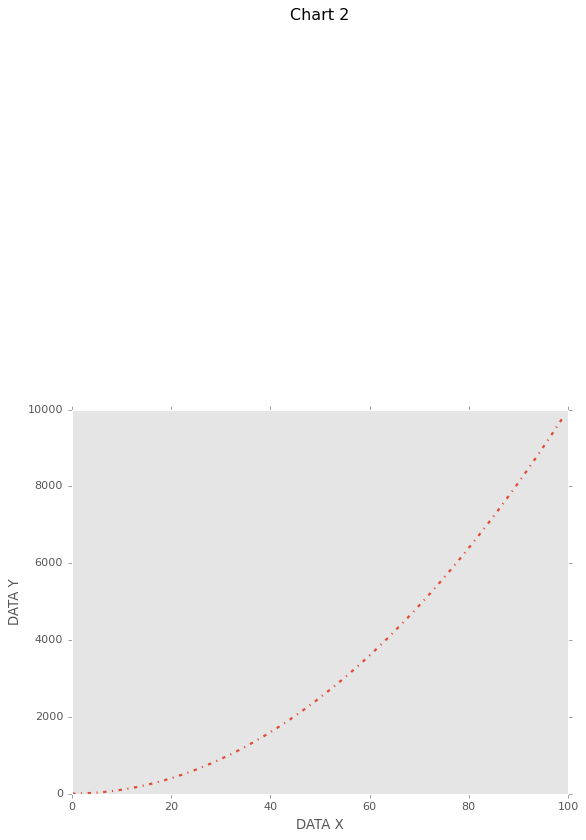

In [120]:
# Method 1
fig, ax = plt.subplots()
ax.plot(x, z, '-.', linewidth=2, markersize=12)
ax.set(xlabel='DATA X', ylabel='DATA Y', title='Chart 2')
ax.title.set(y=2)
ax.grid()
plt.show();

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

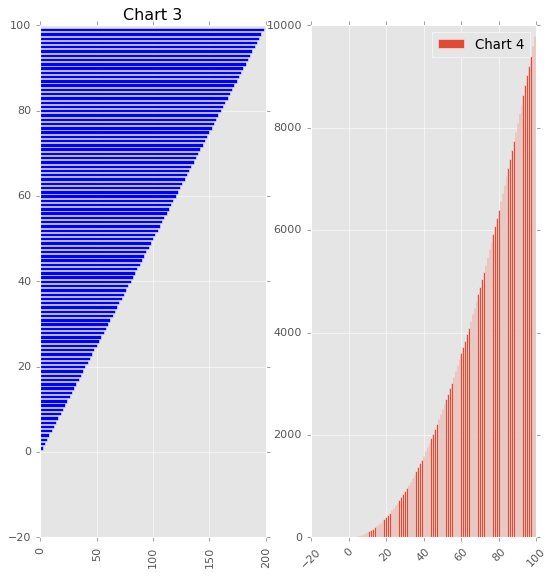

In [121]:
# Method 2
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 8))
axes[0].barh(x, y, color='blue')
axes[0].set(title='Chart 3')
axes[0].xaxis.set_tick_params(rotation=90)
axes[1].bar(x, z, label='Chart 4')
axes[1].xaxis.set_tick_params(rotation=45)
axes[1].legend()
plt.show();

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

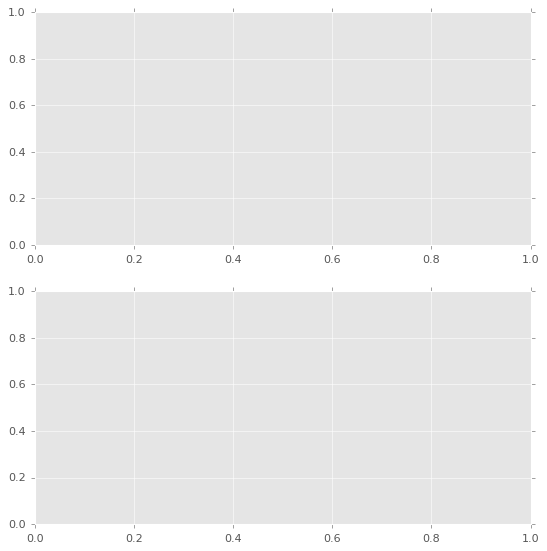

In [122]:
# your code here
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

In [123]:
# your code here
x = np.arange(0,100)
y = x ** 2
z = np.exp(x)

In [124]:
ax[0].plot(x, y, color='green', label = 'x**2')
ax[0].set_yscale('linear')
ax[0].set(title = 'Linear scale')
ax[1].plot(x, z, color='blue', label = 'e**x')
ax[1].set_yscale('log')
ax[1].set(title = 'Exponential scale')
plt.show();

#### As a bonus challenge, try to add a legend to the plot.

In [125]:
# your code here
ax[0].legend()
ax[1].legend()
fig.savefig('../figures/challenge_1')
plt.show();

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [126]:
# your code here
fitbit = pd.read_csv('../data/fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

<ipython-input-127-5b5869221599>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
<ipython-input-127-5b5869221599>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['Weekend', 'Work Days'])


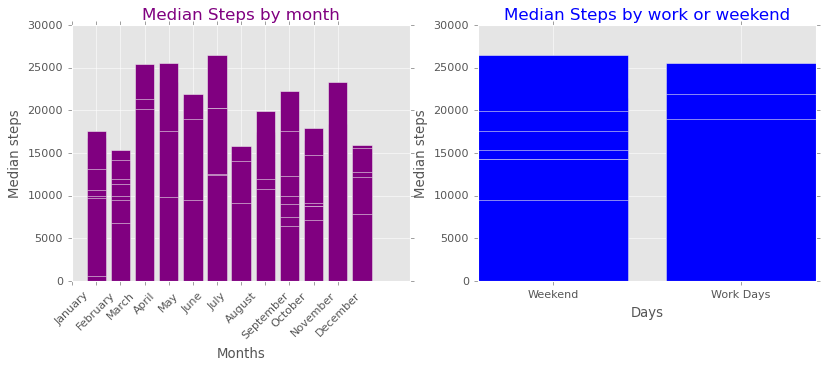

In [127]:
# set figure
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12,4))

# MEDIAN STEPS BY MONTH_ENCODED
# your code here

axes[0].set_title('Median Steps by month', fontsize=15, color='purple')
axes[0].bar(fitbit['Months_encoded'], fitbit['Steps'], color='purple')
axes[0].set(xlabel='Months', ylabel='Median steps')
axes[0].set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.sca(axes[0])
plt.xticks(range(12), rotation=45);

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

axes[1].set_title('Median Steps by work or weekend', fontsize=15, color='blue')
axes[1].bar(fitbit['Work_or_Weekend'], fitbit['Steps'], color='blue')
axes[1].set(xlabel='Days', ylabel='Median steps')
axes[1].set_xticklabels(['Weekend', 'Work Days'])
plt.sca(axes[1])
plt.xticks(range(2));

#Saving the plots
fig.savefig('../figures/challenge_2')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

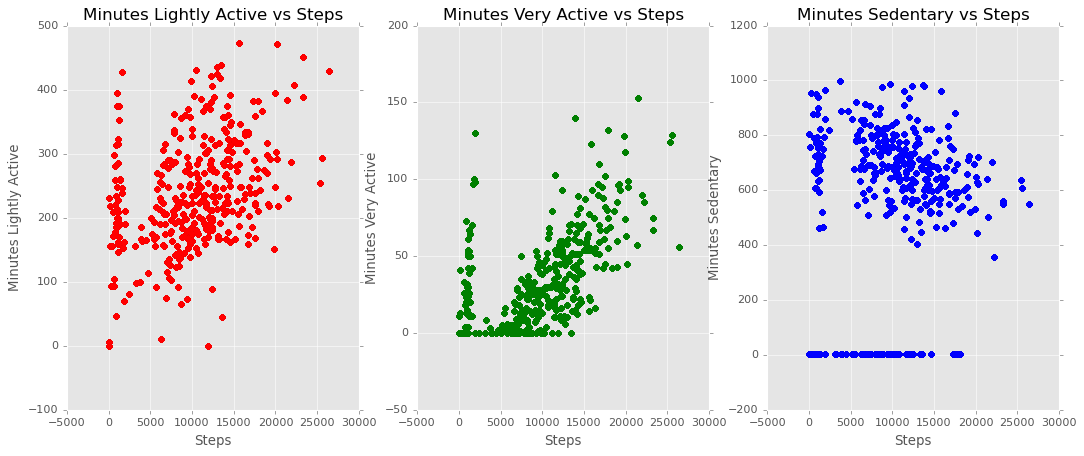

In [128]:
# your code here
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16,6))

x = fitbit['Steps']
y0 = fitbit['Minutes Lightly Active']
y2 = fitbit['Minutes Very Active']
y3 = fitbit['Minutes Sedentary']

axes[0].set_title('Minutes Lightly Active vs Steps', fontsize=15)
axes[0].set(xlabel='Steps', ylabel='Minutes Lightly Active')
axes[1].set_title('Minutes Very Active vs Steps', fontsize=15)
axes[1].set(xlabel='Steps', ylabel='Minutes Very Active')
axes[2].set_title('Minutes Sedentary vs Steps', fontsize=15)
axes[2].set(xlabel='Steps', ylabel='Minutes Sedentary')

for i in fitbit['Steps']:
    axes[0].scatter(x, y0, color='red')
    axes[1].scatter(x, y2, color='green')
    axes[2].scatter(x, y3, color='blue')
    
plt.show();

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [129]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [130]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [131]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=['int64', 'float64']).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [132]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include=['object']).head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

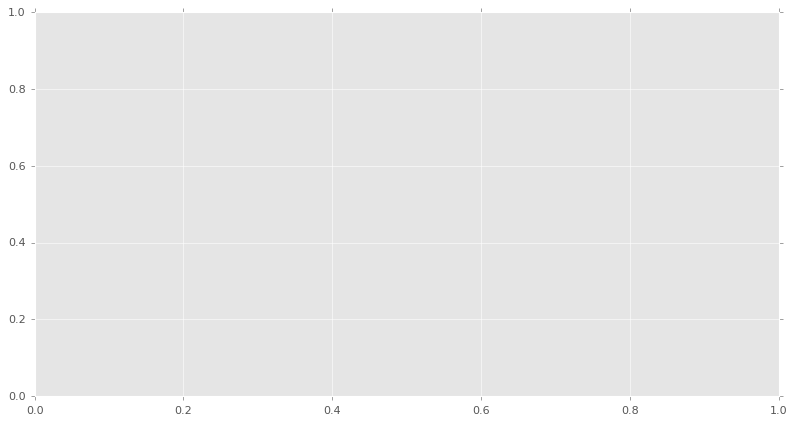

In [133]:
# your code here
fig, axes = plt.subplots(figsize=(12,6))
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

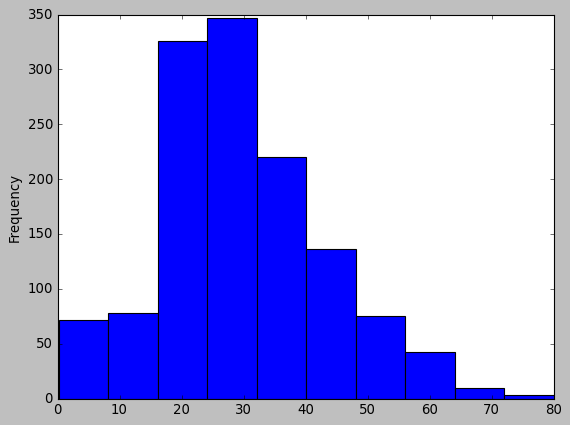

In [134]:
# your code here
axes = titanic['Age'].plot(kind='hist')
plt.show();

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

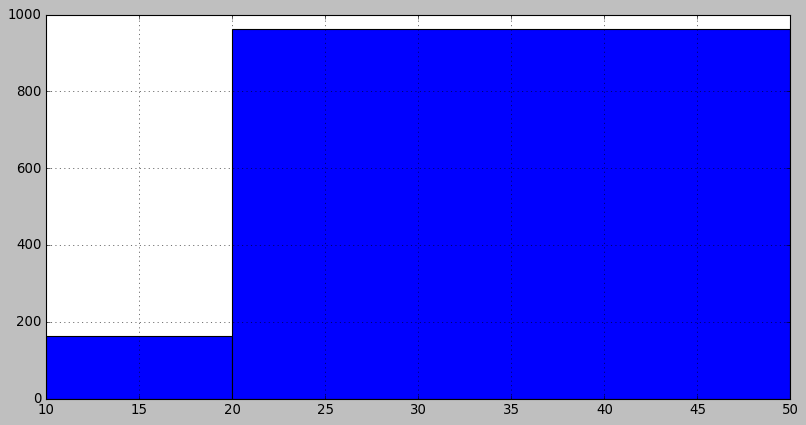

In [135]:
# your code here
fig, axes = plt.subplots(figsize=(12,6))
titanic['Age'].hist(bins=(10, 20, 50))
plt.show();

#### How does the bin size affect your plot?

In [136]:
"""
Due to bin size I miss the number of people between 0 - 10 and 50 - 80. Apart from than, 
I cannot see the values variation of the middle part of the chart,
where most of them are gathered. 
"""

'\nDue to bin size I miss the number of people between 0 - 10 and 50 - 80. Apart from than, \nI cannot see the values variation of the middle part of the chart,\nwhere most of them are gathered. \n'

#### Use seaborn to show the distribution of column `Age`.

/home/marina/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


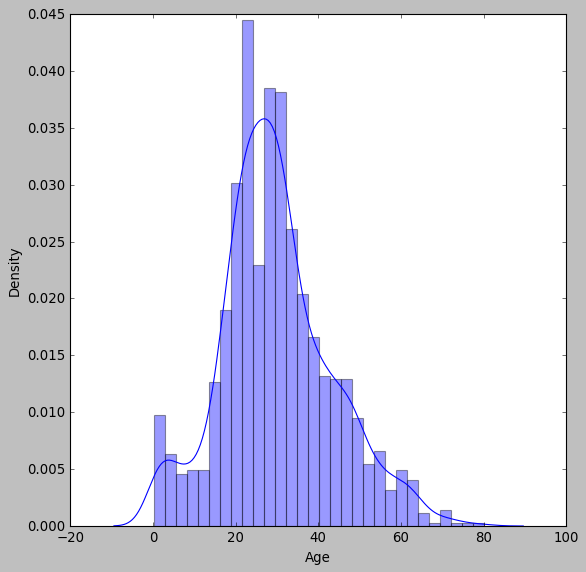

In [139]:
# your code here
fig = plt.figure(figsize=(8,8))
ax = sns.distplot(a = titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

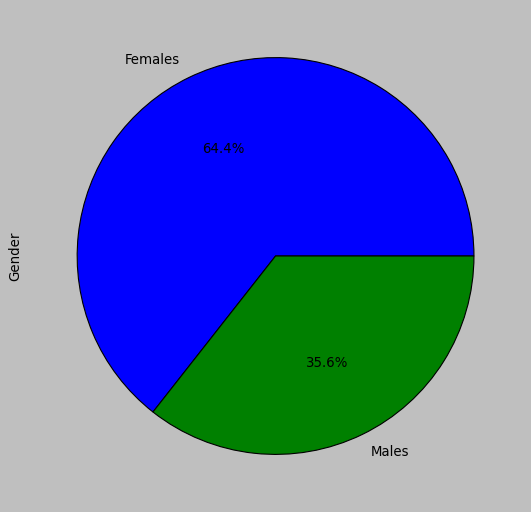

In [147]:
# Method 1 - matplotlib
# your code here

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(8,8))
gender_split = titanic['Gender'].value_counts()
labels_list = ['Females', 'Males']
axes = gender_split.plot.pie(labels=labels_list, autopct="%.1f%%", labeldistance=1.1)

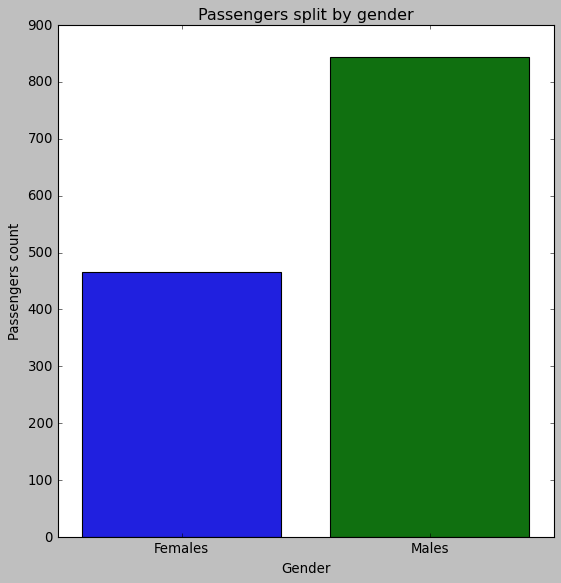

In [162]:
# Method 2 - seaborn
# your code here

fig = plt.figure(figsize=(8,8))
ax = sns.barplot(data=titanic, y=gender_split, x=gender_split)
ax.set_xticklabels(labels_list)
ax.set_ylabel('Passengers count')
ax.set_title('Passengers split by gender');

#### Use the right plot to visualize the column `Pclass`.

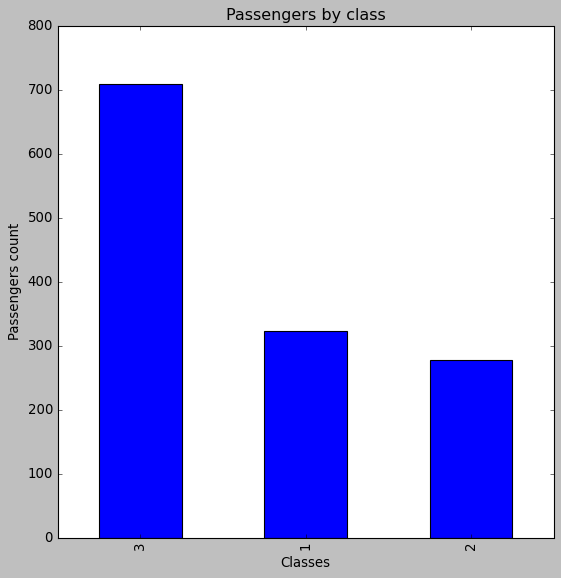

In [172]:
# your code here
pclass_col = titanic['Pclass'].value_counts()
fig = plt.figure(figsize=(8,8))
ax = pclass_col.plot.bar()
ax.set(xlabel='Classes', ylabel=('Passengers count'), title='Passengers by class');

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

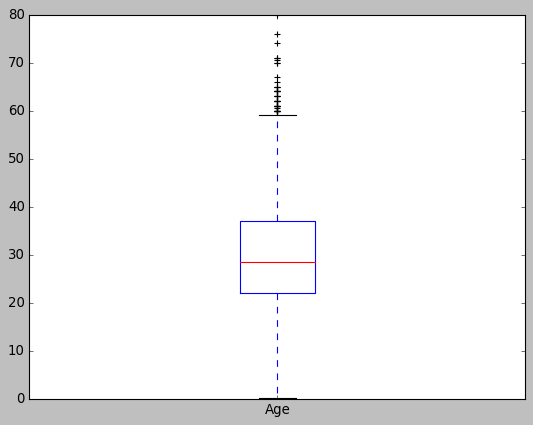

In [190]:
# your code here
titanic['Age'].plot(kind='box');

In [ ]:
"""
When you are facing a new data base, it is very useful to see how the values are distributed and see the outliers, median, max o min
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Most of the age values are gathered between mid 20's - late 30's years, being 30's the main age range of Titanic's passengers. +60 passengers belong to outliers. 
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

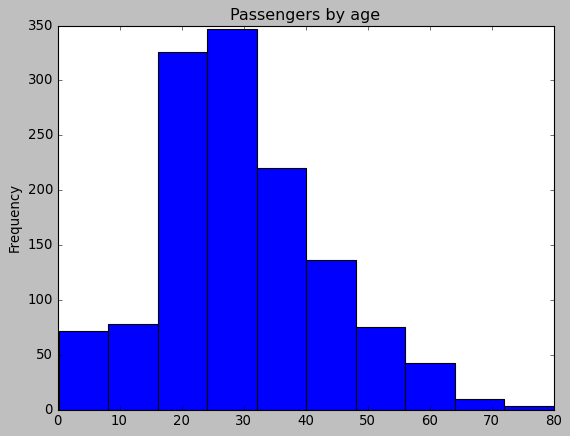

In [204]:
# your code here
titanic['Age'].plot(kind='hist', title='Passengers by age');

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
In terms of age range, in the Titanic there were more Children of 0 - 15 years old passengers than +50
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here